In [1]:
import sys
import os

# # Go up two levels to reach the project root and add it to the path
sys.path.append(os.path.abspath("../"))

In [2]:
from src.loader.load_dataset import load_all_matfiles
df = load_all_matfiles(channels=['vibration_1'])

df.head()


Processing ../dataset/paderborn-db: 0it [00:00, ?it/s]
Processing ../dataset/paderborn-db/KA08:  56%|█████▋    | 45/80 [00:01<00:01, 25.19it/s]

Error loading ../dataset/paderborn-db/KA08/N15_M01_F10_KA08_2.mat: Expecting matrix here


Processing ../dataset/paderborn-db/KI04: 100%|██████████| 80/80 [00:03<00:00, 24.04it/s]

Skipped 1 files.


,bearing_id,torque_nm,speed_rpm,radial_force_n,label,vibration_1_rms,vibration_1_kurtosis,vibration_1_skewness,vibration_1_crest_factor,vibration_1_peak_to_peak,vibration_1_std_dev
0,KA01,0.7,1500,400,1,0.518003,19.384970,1.903199,11.735645,10.336304,0.517786
1,KA01,0.7,900,1000,1,0.227813,12.999637,1.132015,11.413290,4.809570,0.227321
2,KA01,0.7,1500,400,1,0.521671,19.586672,1.982920,10.863386,9.588623,0.521458
3,KA01,0.7,1500,400,1,0.520496,19.800676,1.984644,11.398000,9.835815,0.520280
4,KA01,0.7,1500,1000,1,0.540600,11.751166,0.698111,7.270924,7.778931,0.540341


In [3]:
# Show data distribution
df['label'].value_counts()

label
1    959
2    880
0    480
3    240
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(['label', 'bearing_id', 'torque_nm', 'speed_rpm', 'radial_force_n'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)


smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)



print(y_train.value_counts())
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

label
2    767
0    767
1    767
3    767
Name: count, dtype: int64
X_train shape: (3068, 6)
y_train shape: (3068,)
X_test shape: (512, 6)
y_test shape: (512,)


In [5]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        96
           1       0.97      0.89      0.93       192
           2       0.89      0.95      0.92       176
           3       0.85      0.98      0.91        48

    accuracy                           0.92       512
   macro avg       0.91      0.93      0.92       512
weighted avg       0.92      0.92      0.92       512



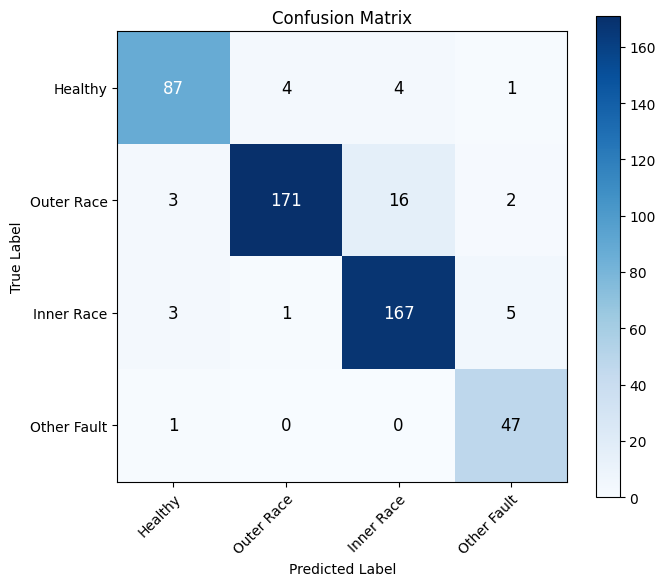

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Example: your predicted and true labels
# y_test, y_pred

# Define class names
class_names = ['Healthy', 'Outer Race', 'Inner Race', 'Other Fault']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=class_names,
    yticklabels=class_names,
    ylabel='True Label',
    xlabel='Predicted Label',
    title='Confusion Matrix'
)

# Rotate x-axis labels for readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = "white" if cm[i, j] > thresh else "black"
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color=color, fontsize=12)

plt.tight_layout()
plt.show()


In [7]:
# confusion_matrix value
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 87,   4,   4,   1],
       [  3, 171,  16,   2],
       [  3,   1, 167,   5],
       [  1,   0,   0,  47]])